<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week5/LSTM_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM Model TensorFlow : ReviewTokoBaju.csv Dataset🐾**

LSTM adalah jenis RNN yang lebih canggih dan dirancang untuk mengatasi masalah vanishing gradient dengan menggunakan tiga gerbang utama: gerbang input (input gate), gerbang lupa (forget gate), dan gerbang output (output gate). Gerbang-gerbang ini membantu LSTM untuk mengingat informasi dalam jangka panjang dan membuang informasi yang tidak relevan. LSTM sangat efektif dalam menangani masalah ketergantungan jangka panjang.

In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

## PreProcessing

In [4]:
# Preprocessing function to clean the text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [5]:
# Clean the Review Text column
data['cleaned_review'] = data['Review Text'].apply(lambda x: clean_text(str(x)))


In [6]:
# Filter out rows where the Review Text is missing
data = data.dropna(subset=['cleaned_review'])


In [7]:
# Extract features and target
X = data['cleaned_review'].values
y = data['Recommended IND'].values


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Tokenize the text and convert to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)


In [10]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [11]:
# Pad sequences to ensure uniform length
max_len = 100  # Set the max length of sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


## Build Model

In [12]:
# Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer with 64 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8127 - loss: 0.4909 - val_accuracy: 0.8189 - val_loss: 0.4722
Epoch 2/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8202 - loss: 0.4623 - val_accuracy: 0.8189 - val_loss: 0.4804
Epoch 3/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8229 - loss: 0.4590 - val_accuracy: 0.8199 - val_loss: 0.3875
Epoch 4/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8165 - loss: 0.4041 - val_accuracy: 0.8821 - val_loss: 0.2845
Epoch 5/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9039 - loss: 0.2405 - val_accuracy: 0.8808 - val_loss: 0.2684


## Evaluate

In [15]:
# Evaluate the model on test data
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [16]:
# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Accuracy: 0.8808
Precision: 0.9424
Recall: 0.9101
F1 Score: 0.9259
AUC: 0.8293


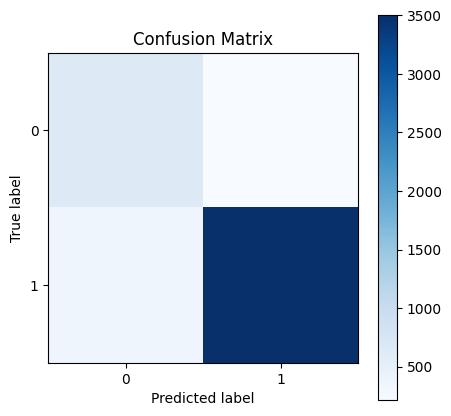

In [18]:
# Confusion Matrix Plot
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
plt.colorbar(cax)
tick_marks = np.arange(2)
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

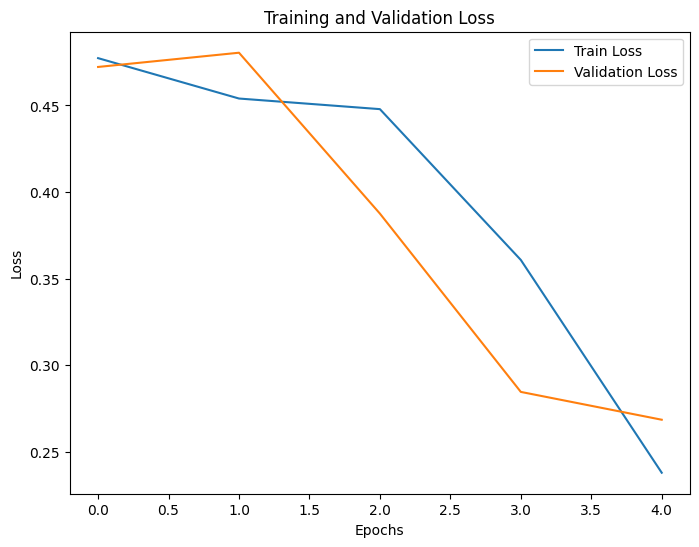

In [19]:
# Plotting the training and validation loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

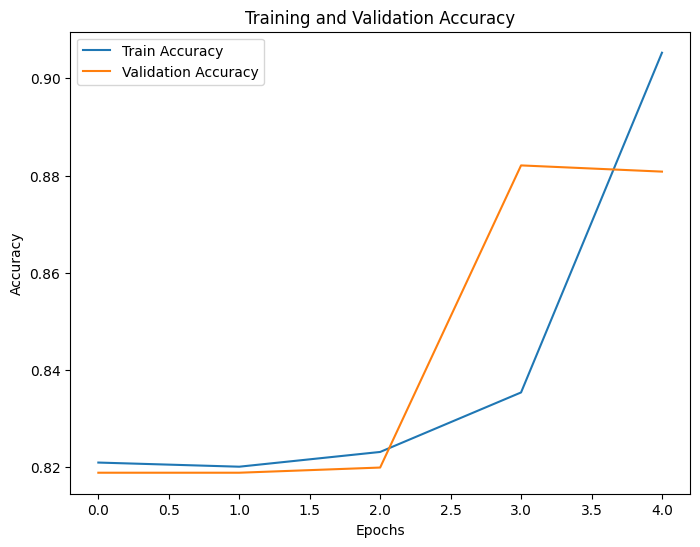

In [20]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#**Penjelasan Singkat**

1️⃣ Akurasi (Accuracy)

Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi.


Akurasi=

*TP+TN/
TP+TN+FP+FN*
​

📌 Keterangan:

TP (True Positive) → Prediksi benar sebagai positif.

TN (True Negative) → Prediksi benar sebagai negatif.

FP (False Positive) → Prediksi salah sebagai positif.

FN (False Negative) → Prediksi salah sebagai negatif.


2️⃣ Presisi (Precision)

Presisi mengukur seberapa akurat model dalam memprediksi kelas positif.

Presisi=
*TP/
TP+FP*



📌 Keterangan:

Jika model memiliki presisi tinggi, berarti model jarang salah dalam memprediksi kelas positif.

Jika presisi rendah, model sering salah memprediksi negatif sebagai positif (False Positive tinggi).

3️⃣ Recall (Sensitivitas)

Recall mengukur seberapa baik model dalam menangkap semua kasus positif.

Recall=
*TP/
TP+FN*


📌 Keterangan:

Jika recall tinggi, berarti model berhasil menangkap hampir semua data positif.
Jika recall rendah, model sering gagal mengenali positif sebagai negatif (False Negative tinggi).

4️⃣ F1-Score (Harmonic Mean)
F1-score menggabungkan presisi dan recall dalam satu metrik menggunakan rata-rata harmonik.

𝐹
1
=
2
×
Presisi
×
Recall/
Presisi
+
Recall

📌 Keterangan:

F1-score tinggi berarti model seimbang dalam presisi dan recall.

Bagus untuk dataset tidak seimbang, karena mempertimbangkan False Positive dan False Negative secara bersamaan.

5️⃣ Area Under Curve (AUC - ROC)
AUC (Area Under Curve) mengukur seberapa baik model membedakan antara kelas positif dan negatif.

AUC berasal dari ROC Curve, yang membandingkan True Positive Rate (TPR) vs False Positive Rate (FPR).

TPR
=
𝑇
𝑃/
𝑇
𝑃
+
𝐹
𝑁

(Sama dengan Recall)

*FPR=
FP/
FP+TN*

📌 Keterangan:

AUC = 1.0 → Model sempurna (memisahkan kelas dengan sempurna).
AUC = 0.5 → Model acak (tidak lebih baik dari tebak-tebakan).
AUC < 0.5 → Model lebih buruk dari acak (terbalik).

6️⃣ Receiver Operating Characteristic (ROC) Curve

ROC Curve adalah grafik yang membandingkan TPR vs FPR pada berbagai threshold.


Sumbu X → FPR (False Positive Rate)

Sumbu Y → TPR (True Positive Rate / Recall)

📌 Bagaimana membacanya?


Semakin tinggi kurva, semakin baik model.

ROC yang mendekati diagonal (AUC ≈ 0.5) berarti model tidak berguna.